# Problem set: Jupyter, pyplot and numpy

<div class="alert alert-block alert-info">The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.</div><br>
The dataset contains five variables: *sepal length*, *sepal width*, *petal length*, *petal width*, and *species*.<br>
Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

Adapted from: *https://en.wikipedia.org/wiki/Iris_flower_data_set*

In [1]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# This just sets the default plot size to be bigger.
pl.rcParams['figure.figsize'] = (16.0, 8.0)

In [5]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html
iris_data = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3))

sepal_length = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=0)
sepal_width = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=1)

petal_length = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=2)
petal_width = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=3)

species = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=None)

<div class="alert alert-block alert-info">Finding the best fit for sepal_length and sepal_width</div>

In [6]:
m, c = np.polyfit(sepal_length, sepal_width, 1)
print("Best fit is m = %f and c = %f" % (m, c))

Best fit is m = -0.061885 and c = 3.418947


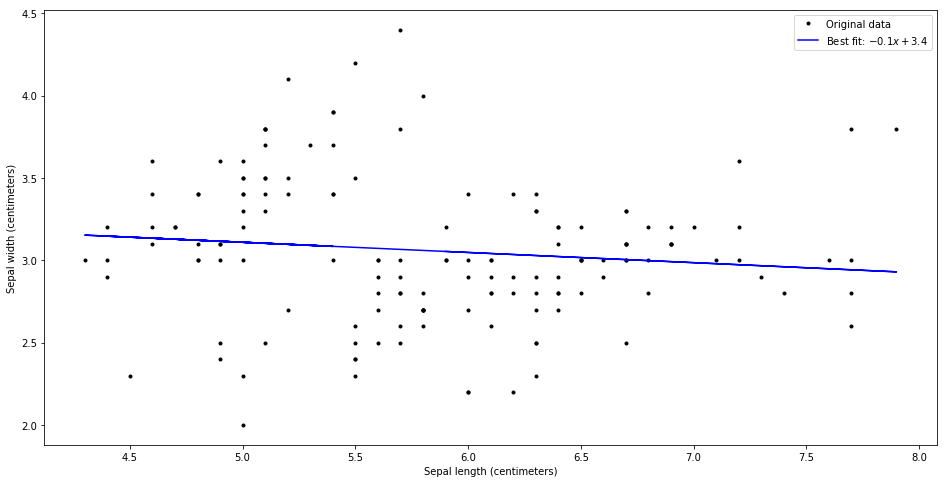

In [7]:
pl.plot(sepal_length, sepal_width, 'k.', label='Original data')
pl.plot(sepal_length, m * sepal_length + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.xlabel('Sepal length (centimeters)')
pl.ylabel('Sepal width (centimeters)')
pl.legend()
pl.show()

In [16]:
dataset = np.genfromtxt('IRIS.csv', delimiter=',', dtype=None)
flower_type = [x[4] for x in dataset]

In [24]:
for i in range(1,len(dataset)-1):
    x, y = [dataset[i][1], dataset[i][2]]
    # determine color
    flower = flower_type[i].decode("utf-8")
    color = ""
    if flower == "setosa":
        color = "red"
    elif flower == "versicolor":
        color = "green"
    elif flower == "virginica":
        color = "blue"

    pl.scatter(x, y, c=color, alpha=1, edgecolor="none")

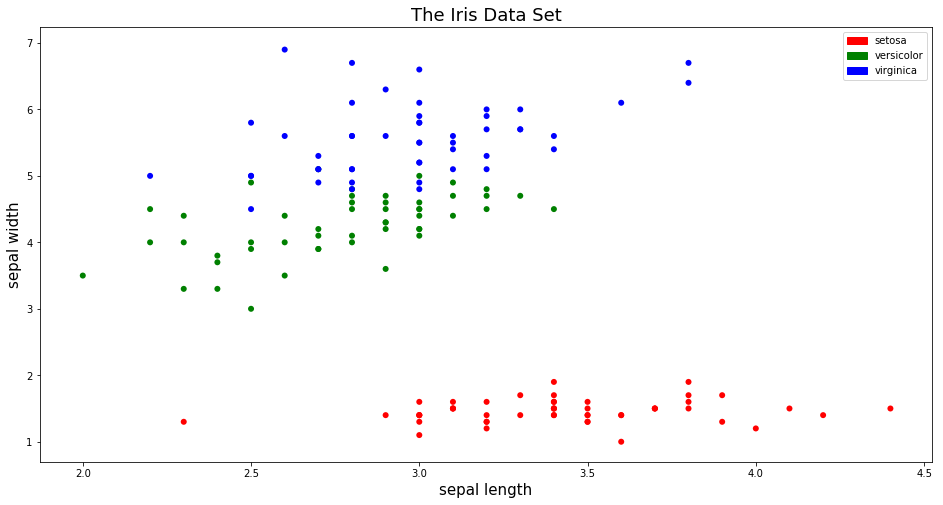

In [25]:
# Legend
red_patch = mpatches.Patch(color='red', label='setosa')
green_patch = mpatches.Patch(color='green', label='versicolor')
blue_patch = mpatches.Patch(color='blue', label='virginica')
pl.legend(handles=[red_patch, green_patch, blue_patch])

pl.title("The Iris Data Set", fontsize=18)
pl.xlabel(r'sepal length', fontsize=15)
pl.ylabel(r'sepal width', fontsize=15)

pl.show()

<div class="alert alert-block alert-info">Scatterplot matrix of all five variables using seaborn library</div>

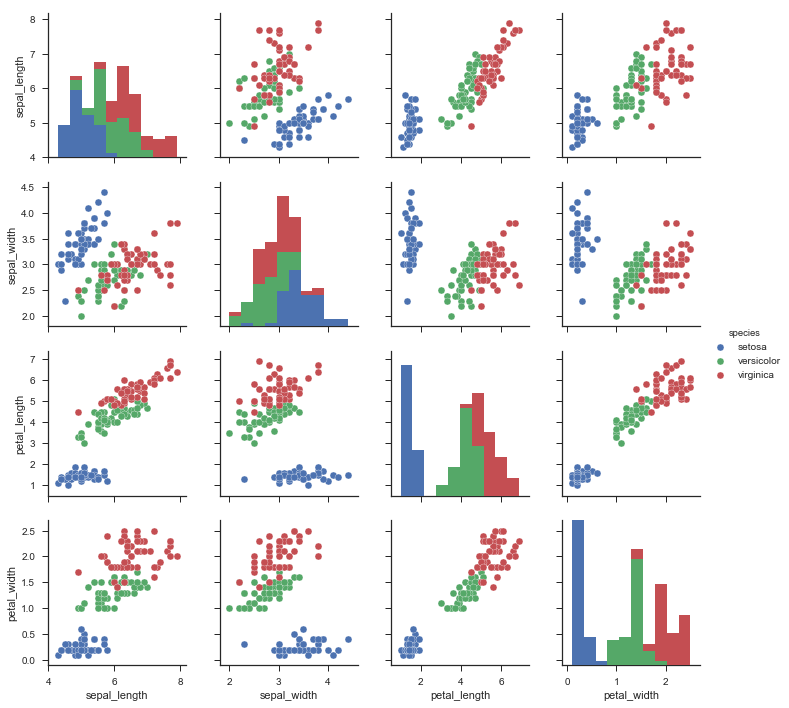

In [26]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
pl.show()

<div class="alert alert-block alert-info">The R squared value of the best fit line</div>

Best fit is m = 0.415755 and c = -0.363076


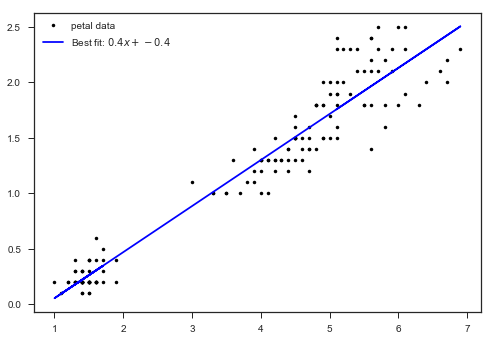

In [45]:
m, c = np.polyfit(petal_length, petal_width, 1)
print("Best fit is m = %f and c = %f" % (m, c))

pl.plot(petal_length, petal_width, 'k.', label='petal data')
pl.plot(petal_length, m * petal_length + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.legend()squared_value = 1.0 - (np.sum((petal_width - m * petal_length - c)**2)/np.sum((petal_width - np.mean(petal_width))**2))
print("The R-squared value is %6.4f" % squared_value)
pl.show()

In [46]:
squared_value = 1.0 - (np.sum((petal_width - m * petal_length - c)**2)/np.sum((petal_width - np.mean(petal_width))**2))
print("The R-squared value is %6.4f" % squared_value)

The R-squared value is 0.9271


<div class="alert alert-block alert-info">Use numpy to select only the data points where species is setosa. Fit a straight line to the variables petal length and petal width. Plot the data points in a scatter plot with the best fit line shown.</div>

Best fit is m = 0.201245 and c = -0.048220


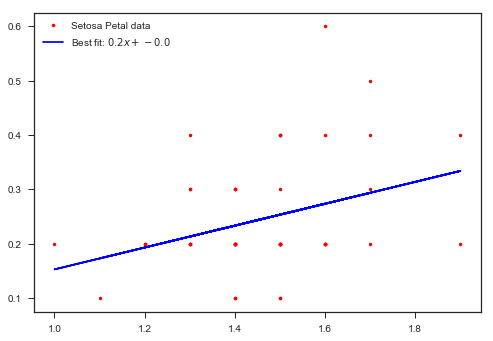

In [52]:
m, c = np.polyfit(petal_length[0:50:1], petal_width[0:50:1], 1)
print("Best fit is m = %f and c = %f" % (m, c))

# Plot the best fit line.
pl.plot(petal_length[0:50:1], petal_width[0:50:1], 'r.', label='Setosa Petal data')
pl.plot(petal_length[0:50:1], m * petal_length[0:50:1] + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.legend()
pl.show()

<div class="alert alert-block alert-info">Gradient Descent</div>

In [47]:
# Find a cost function

def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

In [50]:
eta = 0.0001
m, c = 1.0, 1.0
change = True

while change:
  mnew = m - eta * grad_m(petal_length[0:50:1], petal_width[0:50:1], m, c)
  cnew = c - eta * grad_c(petal_length[0:50:1], petal_width[0:50:1], m, c)
  if m == mnew and c == cnew:
    change = False
  else:
    m, c = mnew, cnew
    
print("m: %20.16f  c: %20.16f" % (m, c))

m:   0.2012450940586720  c:  -0.0482203275137781
